# EDA
* 각 데이터 시트별로 살펴보겠습니다.

## 모듈 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 데이터 로드

In [3]:
path = './data/'

In [4]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
history = pd.read_csv(path + 'historical_transactions.csv')
new_history = pd.read_csv(path + 'new_merchant_transactions.csv')
merchant = pd.read_csv(path + 'merchants.csv')

### train data

#### target

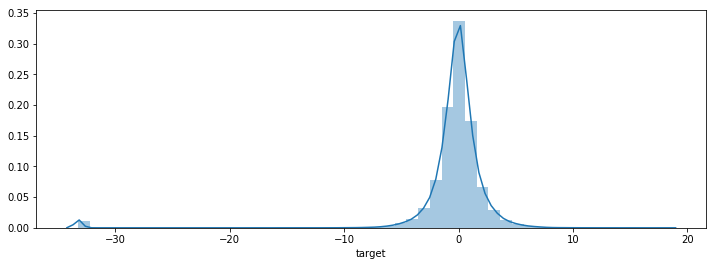

In [5]:
f, ax = plt.subplots(figsize=(12, 4))
sns.distplot(train.target)

In [6]:
train.target.describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

In [7]:
pd.crosstab(train[train.target < -15].target, 'cnt')

col_0,cnt
target,
-33.219281,2207
-17.608147,1
-17.492640,1
-17.441923,1
-17.189636,1
-15.835656,1
-15.553269,1
-15.400146,1
-15.291387,1


In [8]:
train_new = train[train.target > -20]

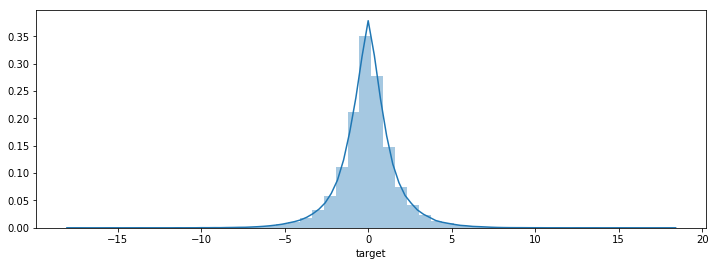

In [9]:
f, ax = plt.subplots(figsize=(12, 4))
sns.distplot(train_new.target)

In [10]:
train_new.target.describe()

count    199710.000000
mean         -0.030879
std           1.717793
min         -17.608147
25%          -0.844513
50%          -0.007783
75%           0.777331
max          17.965068
Name: target, dtype: float64

#### first_active_month

In [11]:
train_new.rename({'first_active_month':'first_active'}, axis=1, inplace=True)

In [12]:
train_new['first_active_year'] = train_new.first_active.apply(lambda v: v.split('-')[0])
train_new['first_active_month'] = train_new.first_active.apply(lambda v: v.split('-')[1])

* year

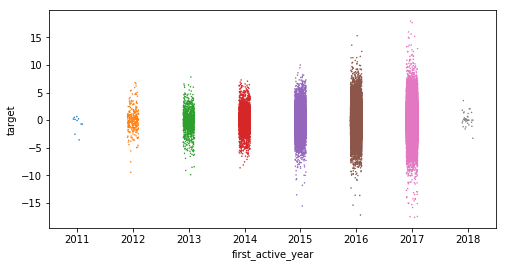

In [13]:
f, ax = plt.subplots(figsize=(8, 4))
sns.stripplot(train_new.first_active_year, train_new.target, size=1.5)

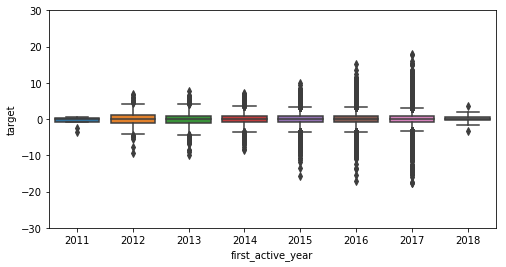

In [14]:
var = 'first_active_year'
data = pd.concat([train_new['target'], train_new[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis(ymin=-30, ymax=30);

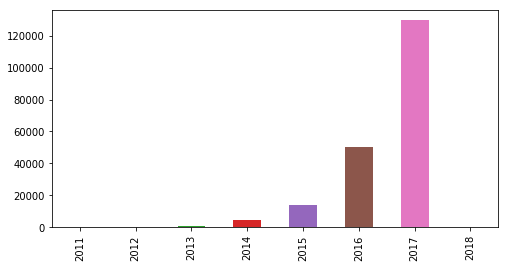

In [15]:
train_new.first_active_year.value_counts().sort_index().plot('bar', figsize=(8,4))

* month

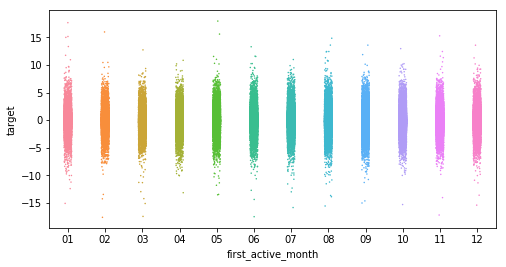

In [16]:
f, ax = plt.subplots(figsize=(8, 4))
sns.stripplot(train_new.first_active_month, train_new.target, size=1.5)

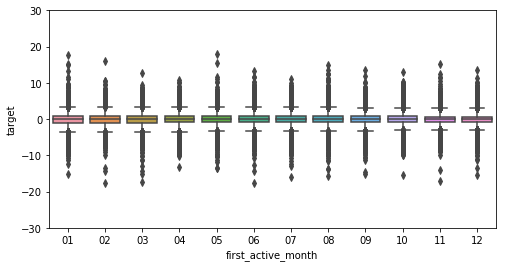

In [17]:
var = 'first_active_month'
data = pd.concat([train_new['target'], train_new[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis(ymin=-30, ymax=30);

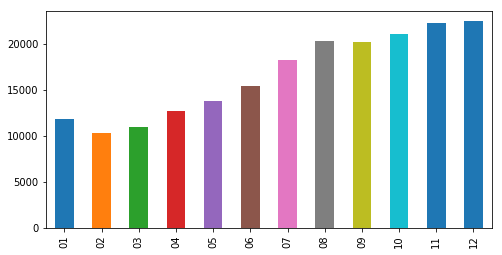

In [18]:
train_new.first_active_month.value_counts().sort_index().plot('bar', figsize=(8,4))

#### feature_1

In [19]:
train_new.feature_1.unique()

array([5, 4, 2, 1, 3], dtype=int64)

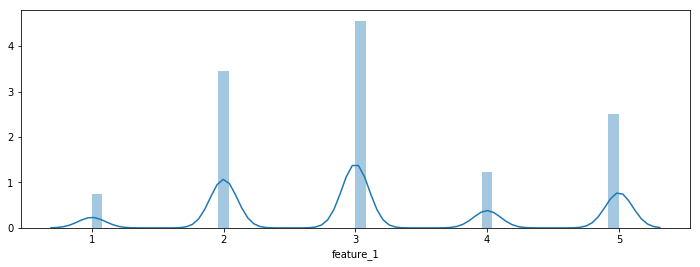

In [20]:
f, ax = plt.subplots(figsize=(12, 4))
sns.distplot(train_new.feature_1)

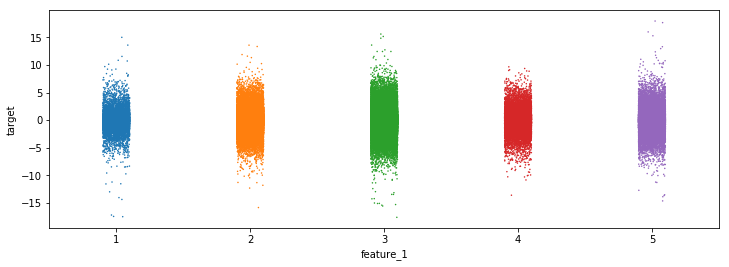

In [21]:
f, ax = plt.subplots(figsize=(12, 4))
sns.stripplot(train_new.feature_1, train_new.target, size=1.5)

#### feature_2

In [22]:
train_new.feature_2.unique()

array([2, 1, 3], dtype=int64)

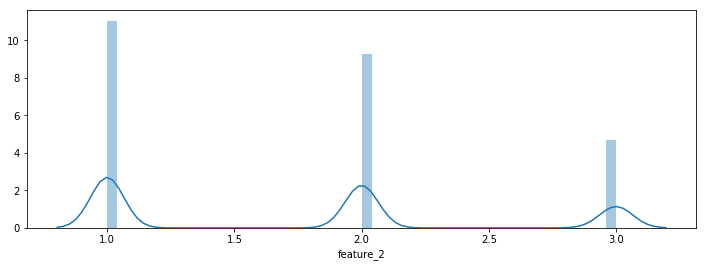

In [23]:
f, ax = plt.subplots(figsize=(12, 4))
sns.distplot(train_new.feature_2)

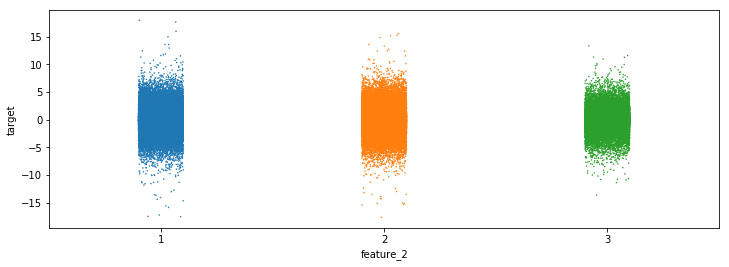

In [24]:
f, ax = plt.subplots(figsize=(12, 4))
sns.stripplot(train_new.feature_2, train_new.target, size=1.5)

#### feature_3

In [25]:
train_new.feature_3.unique()

array([1, 0], dtype=int64)

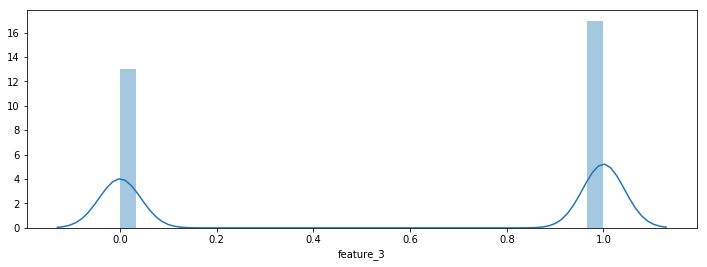

In [26]:
f, ax = plt.subplots(figsize=(12, 4))
sns.distplot(train_new.feature_3)

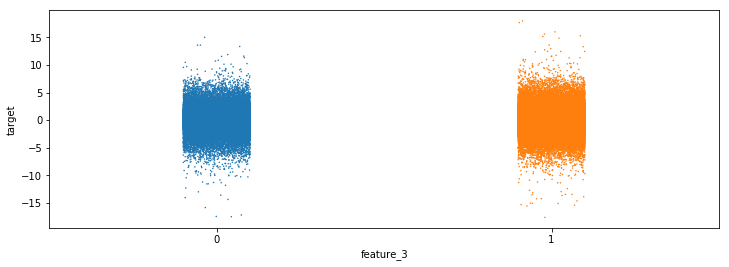

In [27]:
f, ax = plt.subplots(figsize=(12, 4))
sns.stripplot(train_new.feature_3, train_new.target, size=1.5)

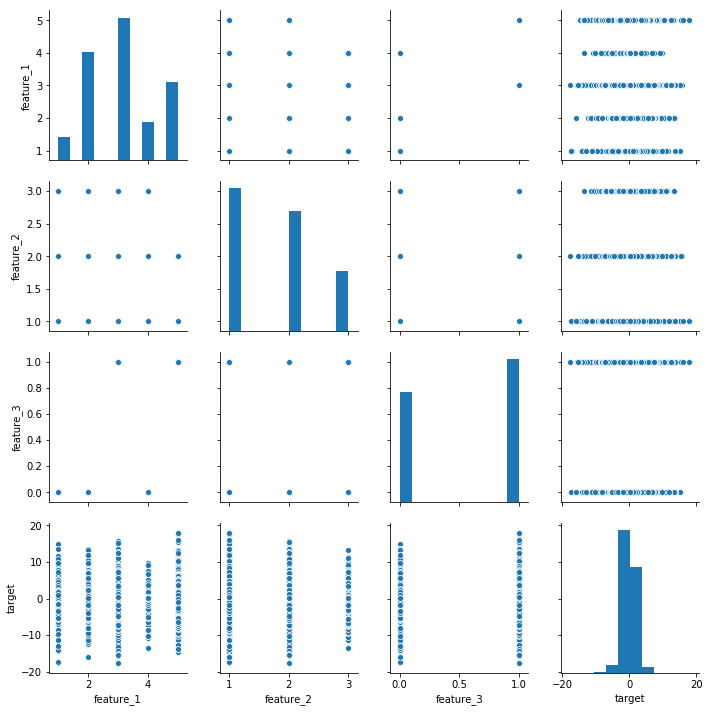

In [28]:
sns.pairplot(train_new.drop(['first_active', 'card_id', 'first_active_month', 'first_active_year'], axis = 1))

### history

#### 카드별 데이터 개수 비교

In [29]:
temp = history.groupby('card_id').count()['authorized_flag']

In [136]:
print("card_id로 groupby 한 뒤 각 그룹별 개수에 대한 요약정보")
temp.describe()

card_id로 groupby 한 뒤 각 그룹별 개수에 대한 요약정보


count    325540.000000
mean         89.427907
std         105.279414
min           2.000000
25%          26.000000
50%          55.000000
75%         111.000000
max        5582.000000
Name: authorized_flag, dtype: float64

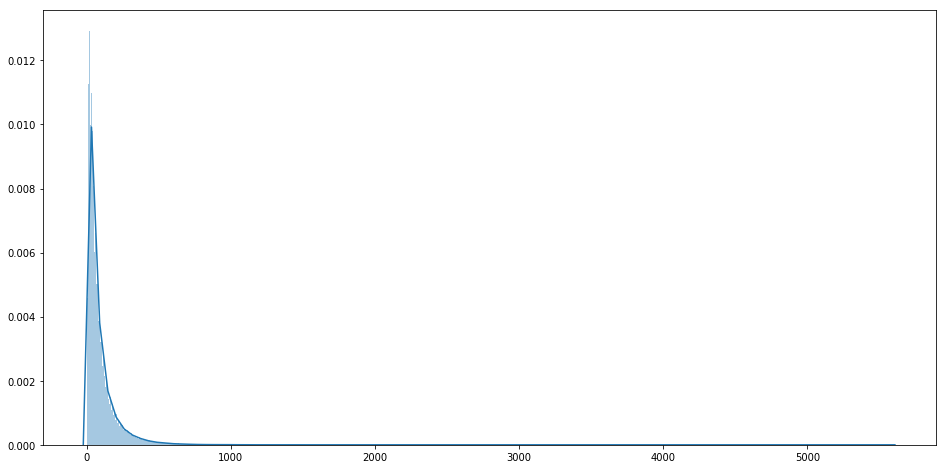

In [137]:
f, ax = plt.subplots(figsize=(16, 8))
sns.distplot(temp.values, bins=1000)

#### 각 피처 정보 확인

In [32]:
history.head(3)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37


---
* authorized_flag

In [138]:
print("type: ", type(history.authorized_flag[0]))

type:  <class 'str'>


In [140]:
print("Value count: ")
history.authorized_flag.value_counts()

Value count: 


Y    26595452
N     2516909
Name: authorized_flag, dtype: int64

---
* city_id
- -1 아마도 널 추정 (city_id가 음수인 도시는 -1 밖에 없음)

In [141]:
print("type: ", type(history.city_id[0]))

type:  <class 'numpy.int64'>


In [142]:
print("Value count(너무 많아서 10개만): ")
history.city_id.value_counts()[:10]

Value count(너무 많아서 10개만): 


 69     4835441
-1      2478624
 19     1151077
 158    1113013
 17      971714
 331     714414
 143     668769
 88      659328
 137     603023
 333     561144
Name: city_id, dtype: int64

In [143]:
print("클래수 개수: ",len(sorted(history.city_id.value_counts().index)))

클래수 개수:  308


---
* category_1

In [144]:
print("type: ", type(history.category_1[0]))

type:  <class 'str'>


In [145]:
print("Value count:")
history.category_1.value_counts()

Value count:


N    27028332
Y     2084029
Name: category_1, dtype: int64

---
* installments
- -1과 999는 아마도 널 또는 전산상오류(상식적으로 999개월 할부라는 것은 말이 안됨!)

In [146]:
print("type: ", type(history.installments[0]))

type:  <class 'numpy.int64'>


In [147]:
print("Value count: ")
history.installments.value_counts()

Value count: 


 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

In [148]:
print("클래스 개수: ",len(history.installments.value_counts()))

클래스 개수:  15


---
* category_3

In [149]:
print("type: ", type(history.category_3[0]))

type:  <class 'str'>


In [150]:
print("Value count: ")
history.category_3.fillna('NULL').value_counts()

Value count: 


A       15411747
B       11677522
C        1844933
NULL      178159
Name: category_3, dtype: int64

---
* merchant_category_id

In [151]:
print("type: ",type(history.merchant_category_id[0]))

type:  <class 'numpy.int64'>


In [154]:
print("Value count(너무 많아서 10개만 표시): ")
history.merchant_category_id.value_counts()[:10]

Value count(너무 많아서 10개만 표시): 


705    5554009
307    3057930
278    2254227
80     1929413
367    1608239
879    1430607
560    1110681
683     822021
437     665634
690     459101
Name: merchant_category_id, dtype: int64

In [155]:
print("클래수 개수: ", len(history.merchant_category_id.value_counts()))

클래수 개수:  327


---
* month lag

In [156]:
print("타입: ", type(history.month_lag[0]))

타입:  <class 'numpy.int64'>


In [157]:
print("Value count: ")
history.month_lag.value_counts()

Value count: 


-2     3857276
-1     3627430
 0     3470946
-3     3095651
-4     2639805
-5     2364790
-6     2050048
-7     1769844
-8     1427846
-9     1234724
-10    1085053
-11    1007878
-12     791973
-13     689097
Name: month_lag, dtype: int64

In [158]:
print("클래수 개수: ", len(history.month_lag.value_counts()))

클래수 개수:  14


---
* purchase_amount
* purchase_amount에 대한 분포는 매우 긴꼬리 분포
* 변환하기 전 데이터는 매우 양극단적인 데이터
* 극단적이지만 구매금액이 낮은 데이터의 비율이 정말 크다.

In [162]:
print("type: ", type(history.purchase_amount[0]))

type:  <class 'numpy.float64'>


In [164]:
print("Describe: ")
history.purchase_amount.describe()

Describe: 


count    2.911236e+07
mean     3.640090e-02
std      1.123522e+03
min     -7.469078e-01
25%     -7.203559e-01
50%     -6.883495e-01
75%     -6.032543e-01
max      6.010604e+06
Name: purchase_amount, dtype: float64

* 75 % 까지 평균보다 금액이 적다. 상당히 낮은 금액쪽으로 데이터가 치우쳐져 있음

In [165]:
print("음수 데이터 개수: ", history[history.purchase_amount < 0].shape[0])
print("양수 데이터 개수: ", history[history.purchase_amount >= 0].shape[0])

음수 데이터 개수:  28036884
양수 데이터 개수:  1075477


데이터 분포: 


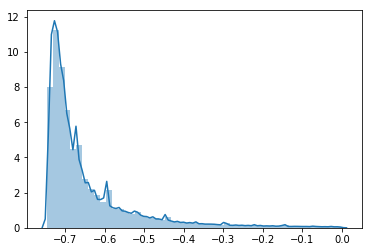

In [166]:
print("데이터 분포: ")
sns.distplot(history[history.purchase_amount <= 0].purchase_amount.values)

* 거래금액이 차이가 많이 나는 이유는 무엇일까?
* 1) 금액이 큰 카드는 대체로 금액이 큰 편일 것이다. (카드 ID 별 거래금액을 한번 보자)
* 2) 물, 빵 재화는 싼 반면TV, NoteBook 등 특수 재화는 비쌈

In [174]:
print("금액이 큰 거래 내역 확인: ")
history[history.purchase_amount >= 1000].head(10)

금액이 큰 거래 내역 확인: 


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
6007,N,C_ID_198914cf94,36,N,0,A,650,M_ID_51e7c830bf,-6,11269.666518,2017-08-24 18:58:52,2.0,24,29
15456,N,C_ID_57c74056eb,69,N,0,A,178,M_ID_f40ccc1312,-10,2012.832976,2017-04-13 13:20:15,1.0,9,29
21571,N,C_ID_418e92d805,69,N,0,A,683,M_ID_2637773dd2,-9,7287.467246,2017-05-26 13:52:34,1.0,9,34
90143,N,C_ID_970c68f3b1,244,N,1,B,818,M_ID_58bb6894f2,-8,5499.272868,2017-06-23 12:34:03,3.0,2,12
224796,N,C_ID_7b0fd6aa9b,69,N,0,A,222,M_ID_983777dc30,-7,1650.676431,2017-04-10 15:30:22,1.0,9,21
235835,N,C_ID_19788337bc,246,N,0,A,80,M_ID_5345e93a67,-6,13523.575202,2017-08-21 23:25:00,3.0,1,37
263562,N,C_ID_f402df8a93,212,N,1,B,356,NaN,-4,7614.321136,2017-10-17 21:41:24,4.0,4,21
271376,N,C_ID_5603e6924b,17,N,0,A,842,M_ID_93bdd4b285,0,19536.621128,2018-02-06 18:34:36,4.0,22,37
298283,N,C_ID_dae3287efa,213,N,1,B,560,M_ID_0f87a7d181,-4,3615.484855,2017-07-08 08:38:03,1.0,9,34
333442,N,C_ID_9564bfb27a,117,N,0,A,307,M_ID_fa2763a28a,0,10848.200015,2018-02-26 18:37:02,4.0,13,19


In [171]:
print("C_ID_198914cf94 데이터: ")
history[history.card_id == 'C_ID_198914cf94']

C_ID_198914cf94 데이터: 


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
5682,Y,C_ID_198914cf94,36,N,0,A,360,M_ID_5ac45727e4,-6,-0.738643,2017-08-24 19:51:57,2.0,24,34
5683,Y,C_ID_198914cf94,36,N,0,A,278,M_ID_c9fd6763b8,-2,-0.716855,2017-12-11 12:35:30,2.0,24,37
5684,Y,C_ID_198914cf94,69,N,0,A,879,M_ID_00a6ca8a8a,-2,-0.296112,2017-12-17 10:39:40,1.0,9,29
5685,Y,C_ID_198914cf94,36,N,0,A,278,M_ID_c9fd6763b8,-9,-0.717276,2017-05-25 11:00:18,2.0,24,37
5686,Y,C_ID_198914cf94,36,N,0,A,367,M_ID_05e64ff728,-6,-0.742400,2017-08-07 19:52:42,2.0,24,16
5687,Y,C_ID_198914cf94,36,N,0,A,278,M_ID_c9fd6763b8,-4,-0.680791,2017-10-08 15:36:27,2.0,24,37
5688,Y,C_ID_198914cf94,36,N,0,A,667,M_ID_4d0a3340b7,-5,1.161459,2017-09-25 13:30:26,2.0,24,21
5689,Y,C_ID_198914cf94,36,N,0,A,705,M_ID_82e1b2a782,-6,-0.705525,2017-08-20 16:49:35,2.0,24,33
5690,Y,C_ID_198914cf94,126,N,0,A,80,M_ID_e92d89ab39,-6,-0.716855,2017-08-19 20:41:58,4.0,4,37
5691,Y,C_ID_198914cf94,36,N,0,A,454,M_ID_652bd3bcf3,-1,-0.740897,2018-01-06 17:11:03,2.0,24,39


In [172]:
print("C_ID_57c74056eb 데이터: ")
history[history.card_id == 'C_ID_57c74056eb']

C_ID_57c74056eb 데이터: 


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
15423,Y,C_ID_57c74056eb,291,N,0,A,367,M_ID_527d03530f,-11,-0.645524,2017-03-10 17:50:03,1.0,9,16
15424,Y,C_ID_57c74056eb,69,N,0,A,705,M_ID_b5b80addf5,-10,-0.705480,2017-04-12 10:08:08,1.0,9,33
15425,Y,C_ID_57c74056eb,69,N,0,A,437,M_ID_117b8a93ec,-10,-0.712978,2017-04-11 16:19:02,1.0,9,15
15426,Y,C_ID_57c74056eb,69,N,0,A,278,M_ID_a606c3a162,-10,-0.706336,2017-04-26 09:43:29,1.0,9,37
15427,Y,C_ID_57c74056eb,69,N,0,A,683,M_ID_2637773dd2,-11,-0.696870,2017-03-27 00:53:51,1.0,9,34
15428,Y,C_ID_57c74056eb,69,N,0,A,178,M_ID_f40ccc1312,-4,-0.545553,2017-10-26 15:17:24,1.0,9,29
15429,Y,C_ID_57c74056eb,69,N,0,A,705,M_ID_11d9bf7dcc,0,-0.717907,2018-02-15 10:01:21,1.0,9,33
15430,Y,C_ID_57c74056eb,69,N,0,A,705,M_ID_11d9bf7dcc,-2,-0.691385,2017-12-27 08:55:35,1.0,9,33
15431,Y,C_ID_57c74056eb,69,N,0,A,705,M_ID_3ae04779cd,-3,-0.696990,2017-11-14 17:29:16,1.0,9,33
15432,Y,C_ID_57c74056eb,69,N,0,A,705,M_ID_b5b80addf5,-5,0.623675,2017-09-18 18:28:54,1.0,9,33


In [173]:
print("C_ID_418e92d805 데이터: ")
history[history.card_id == 'C_ID_418e92d805']

C_ID_418e92d805 데이터: 


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
21459,N,C_ID_418e92d805,69,N,0,A,367,M_ID_820c7b73c8,-11,-0.724578,2017-03-21 20:37:54,1.0,9,16
21460,Y,C_ID_418e92d805,69,N,0,A,278,M_ID_f86439cec0,-2,-0.727373,2017-12-05 14:58:03,1.0,9,37
21461,N,C_ID_418e92d805,69,N,0,A,705,M_ID_1f4773aa76,-9,-0.735052,2017-05-23 11:23:15,1.0,9,33
21462,Y,C_ID_418e92d805,69,N,0,A,80,M_ID_5ba019a379,-12,-0.596643,2017-02-02 18:13:57,1.0,9,37
21463,Y,C_ID_418e92d805,69,N,0,A,367,M_ID_0f5fd331f8,-1,-0.703526,2018-01-11 10:49:36,1.0,9,16
21464,Y,C_ID_418e92d805,69,N,0,A,879,M_ID_00a6ca8a8a,-3,-0.596643,2017-11-08 19:59:17,1.0,9,29
21465,Y,C_ID_418e92d805,69,N,0,A,367,M_ID_0f5fd331f8,-4,-0.724368,2017-10-13 13:21:36,1.0,9,16
21466,N,C_ID_418e92d805,69,N,0,A,360,M_ID_57eb30da39,-3,-0.716855,2017-11-29 00:00:00,1.0,9,34
21467,Y,C_ID_418e92d805,69,N,0,A,683,M_ID_2637773dd2,-3,-0.709342,2017-11-25 00:00:00,1.0,9,34
21468,Y,C_ID_418e92d805,69,N,0,A,560,M_ID_2d2c860269,-5,-0.713399,2017-09-16 17:31:47,1.0,9,34


* 금액이 큰 카드의 경우 항상 금액이 큰 것은 아님.
* 금액이 큰 거래내역의 경우 승인이 안된 경우가 많다.

In [175]:
print("금액이 550 이상인 거래데이터의 승인여부 비율: ")
history[history.purchase_amount >= 550].authorized_flag.value_counts()

금액이 550 이상인 거래데이터의 승인여부 비율: 


N    913
Name: authorized_flag, dtype: int64

* 금액이 큰 거래내역(550이상)의 경우 대체적으로 승인 거절

---
* purchase_date

In [177]:
print("type: ", type(history.purchase_date[0]))

type:  <class 'str'>


In [185]:
temp = sorted(history.purchase_date.unique())
print("가장 이른 날: ", temp[0])
print("가장 늦은 날: ", temp[-1])

가장 이른 날:  2017-01-01 00:00:08
가장 늦은 날:  2018-02-28 23:59:51


* 케글 설명에는 3개월치 데이터

In [200]:
def purchase_duration(purchase_date):
    temp = sorted(purchase_date.values)
    start = temp[0]
    end = temp[-1]
    
    return (start, end)

In [206]:
history.purchase_date.groupby(history.card_id).agg(purchase_duration)[:5]

card_id
C_ID_00007093c1    (2017-02-14 14:00:43, 2018-02-27 05:14:57)
C_ID_0001238066    (2017-09-28 22:25:14, 2018-02-27 16:18:59)
C_ID_0001506ef0    (2017-01-14 16:16:01, 2018-02-17 12:33:56)
C_ID_0001793786    (2017-01-21 10:15:21, 2017-10-31 20:20:18)
C_ID_000183fdda    (2017-08-07 09:49:14, 2018-02-25 20:57:08)
Name: purchase_date, dtype: object

* 실제로 1년 이상의 데이터도 포함돼 있음.

---
* category_2

In [208]:
print("type: ", type(history.category_2[0]))

type:  <class 'numpy.float64'>


In [210]:
print("Value count: ")
history.category_2.fillna('NULL').value_counts()

Value count: 


1.0     15177199
3.0      3911795
5.0      3725915
NULL     2652864
4.0      2618053
2.0      1026535
Name: category_2, dtype: int64

---
* state_id
* -1은 널 데이터로 추정

In [211]:
print("type: ", type(history.state_id[0]))

type:  <class 'numpy.int64'>


In [212]:
print("Value count:")
history.state_id.value_counts()

Value count:


 9     10568881
-1      2652864
 16     2143420
 15     2079255
 5      1655124
 19     1204287
 20     1141197
 22      971714
 21      929594
 4       840820
 7       640712
 13      634006
 11      631127
 3       542220
 12      385643
 18      384876
 2       371728
 1       247753
 10      222463
 23      206011
 24      205952
 14      171513
 8       157829
 17      116139
 6         7233
Name: state_id, dtype: int64

In [213]:
print("클래수 개수: ", history.state_id.unique().shape[0])

클래수 개수:  25


---
* subsector_id

In [215]:
print("type: ", type(history.subsector_id[0]))

type:  <class 'numpy.int64'>


In [218]:
print("Value count(너무 많아서 10개만 출력): ")
history.subsector_id.value_counts()[:10]

Value count(너무 많아서 10개만 출력): 


33    5594146
37    4531755
19    3147440
29    2813095
34    2759431
27    1658301
16    1651384
21     837612
7      711977
1      695263
Name: subsector_id, dtype: int64

In [219]:
print("클래수 개수: ", history.subsector_id.unique().shape[0])

클래수 개수:  41


#### merchant_id, merchant_category_id, subsector_id 사이의 관계 확인

* 각각의 포함 관계, 상식적으론 subsector > category > merchant 순으로 예상

In [222]:
history.merchant_category_id.groupby(history.merchant_id).agg(lambda v: v.unique())

merchant_id
M_ID_000025127f                                                 80
M_ID_0000699140                                                 87
M_ID_00006a5552                                                178
M_ID_000087311e                                         [206, 748]
M_ID_0000ab0b2d                                         [506, 367]
M_ID_0000edb21f                                                422
M_ID_0000f3475c                                                422
M_ID_0000fd7caf                                                557
M_ID_0001c38687                                                774
M_ID_0002237144                                                195
M_ID_0002299001                                                683
M_ID_0002493bf9                                         [356, 827]
M_ID_000262d9a4                                                166
M_ID_0002812aa2                                         [422, 497]
M_ID_00029eed97                                   

In [224]:
a = history.subsector_id.groupby(history.merchant_category_id).agg(lambda v: v.unique())

In [234]:
[type(v) for v in a.values]

[numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy

* merchant_id는 category_id에 종속적이지 않음. 즉, 한 상인이 다양한 category_id를 가질 수 있다.
* category_id는 subsector_id에 종속적. 즉, 한 카테고리는 한 카테고리 그룹에만 속한다.